# Task 1

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#reading into the excel file for the first task
df = pd.read_excel("task1-dataset.ods", engine = "odf")

In [15]:
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace('\r', '', regex=False)

### Preprocessing

In [16]:
# Removin the first row if it has duplicated column names

df.columns = df.iloc[0]
df = df[1:].copy()
df.columns.name = None
df.reset_index(drop= True, inplace= True)

In [17]:
# converting the relevant columns into numbers
columns_to_convert = [
    "2010 WHO-estimated road traffic fatalities (update)",
    "2016 WHO-estimated road traffic fatalities (update)",
    "2010 WHO-estimated rate per 100 000 population (update)",
    "2016 WHO-estimated rate per 100 000 population (update)",
    "Population"
]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors="coerce")

In [ ]:
df_nomissing = df.dropna(subset = columns_to_convert)

# Figure 1

C:\Users\tring\AppData\Local\Temp\ipykernel_4328\1398045819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nomissing["Rate_2010_Bin"] = pd.qcut(


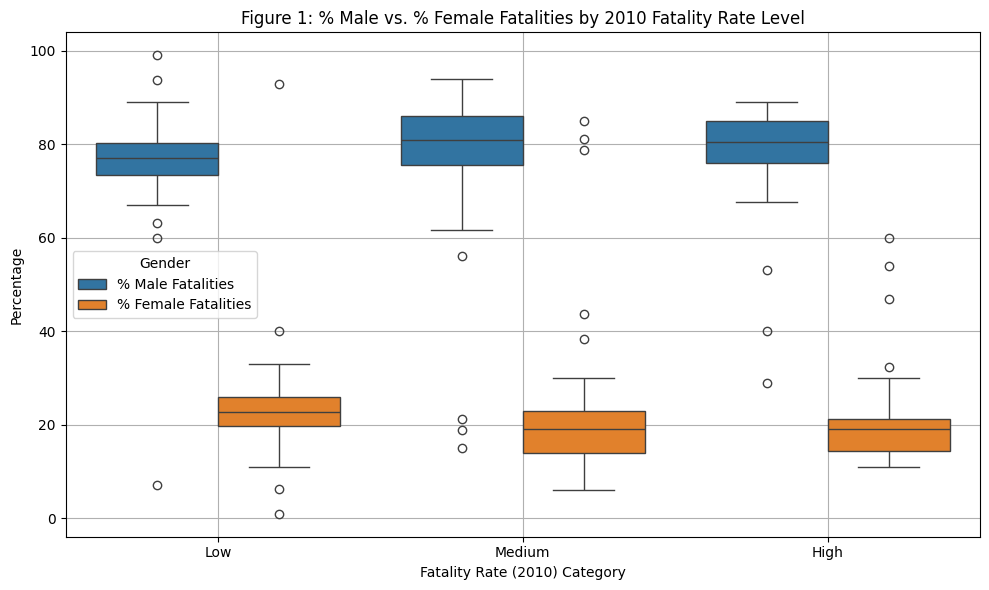

In [72]:
# Binning the 2010 fatality rate into low, medium, high
df_nomissing["Rate_2010_Bin"] = pd.qcut(
    df_nomissing["2010 WHO-estimated rate per 100 000 population (update)"], 
    q=3, labels=["Low", "Medium", "High"]
)

# Melting male/female % columns into long format
df_long = df_nomissing[[
    "Rate_2010_Bin", 
    "Reported fatalities gender distribution  (% Males)", 
    "Reported fatalities gender distribution  (%Females)"
]].copy()

df_long = df_long.rename(columns={
    "Reported fatalities gender distribution  (% Males)": "% Male Fatalities",
    "Reported fatalities gender distribution  (%Females)": "% Female Fatalities"
})

df_melted = df_long.melt(id_vars="Rate_2010_Bin", var_name="Gender", value_name="Percentage")

#Box plot figure
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="Rate_2010_Bin", y="Percentage", hue="Gender")
plt.title("Figure 1: % Male vs. % Female Fatalities by 2010 Fatality Rate Level")
plt.xlabel("Fatality Rate (2010) Category")
plt.ylabel("Percentage")
plt.legend(title="Gender")
plt.grid(True)
plt.tight_layout()
plt.savefig("figure_gender_boxplot_by_rate2010.png", dpi=300)
plt.show()


# Figure 2

C:\Users\tring\AppData\Local\Temp\ipykernel_4328\989534693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


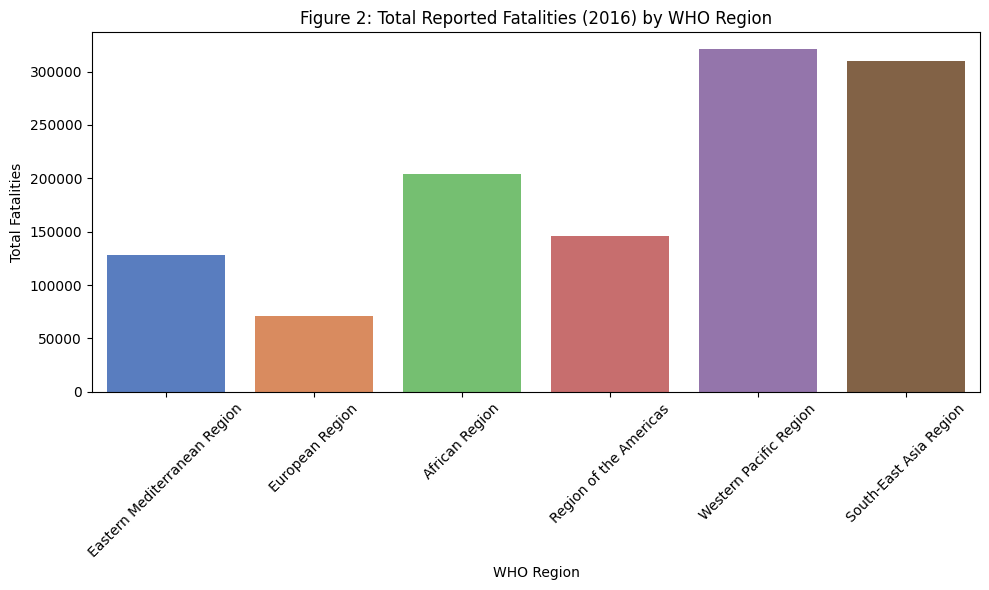

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_nomissing,
    x="WHO Region",
    y="2016 WHO-estimated road traffic fatalities (update)",
    estimator=sum,
    errorbar=None,
    palette="muted"
)
# Bar plot
plt.title("Figure 2: Total Reported Fatalities (2016) by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("Total Fatalities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("figure3_barchart_by_region.png", dpi=300)
plt.show()



# Figure 3

In [ ]:
# Converting to numeric
df_nomissing["Maximum urban speed limit "] = pd.to_numeric(
    df_nomissing["Maximum urban speed limit "], errors="coerce"
)

#Catergorized bins
df_nomissing["Speed Bin"] = pd.cut(
    df_nomissing["Maximum urban speed limit "],
    bins=[0, 30, 50, 70, 90, 120, float("inf")],
    labels=["≤30", "31–50", "51–70", "71–90", "91–120", ">120"]
)


C:\Users\tring\AppData\Local\Temp\ipykernel_4328\3466437500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nomissing["Maximum urban speed limit "] = pd.to_numeric(
C:\Users\tring\AppData\Local\Temp\ipykernel_4328\3466437500.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nomissing["Speed Bin"] = pd.cut(


C:\Users\tring\AppData\Local\Temp\ipykernel_4328\2560642573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


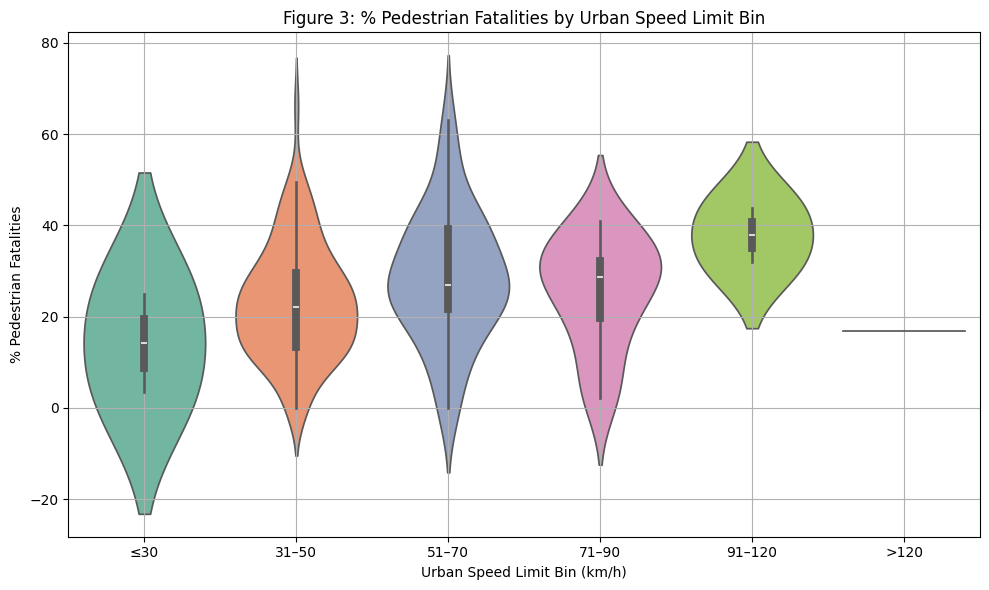

In [74]:
plt.figure(figsize=(10,6))
sns.violinplot(
    data=df_nomissing,
    x="Speed Bin",
    y="Reported fatalities user distribution  (% pedestrian)",
    palette="Set2",
    inner="box"
)
#Violin chart 
plt.title("Figure 3: % Pedestrian Fatalities by Urban Speed Limit Bin")
plt.xlabel("Urban Speed Limit Bin (km/h)")
plt.ylabel("% Pedestrian Fatalities")
plt.grid(True)
plt.tight_layout()
plt.savefig("figureX_violin_pedestrian_by_speedbin.png", dpi=300)
plt.show()


# Figure 4

C:\Users\tring\AppData\Local\Temp\ipykernel_4328\1753766168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


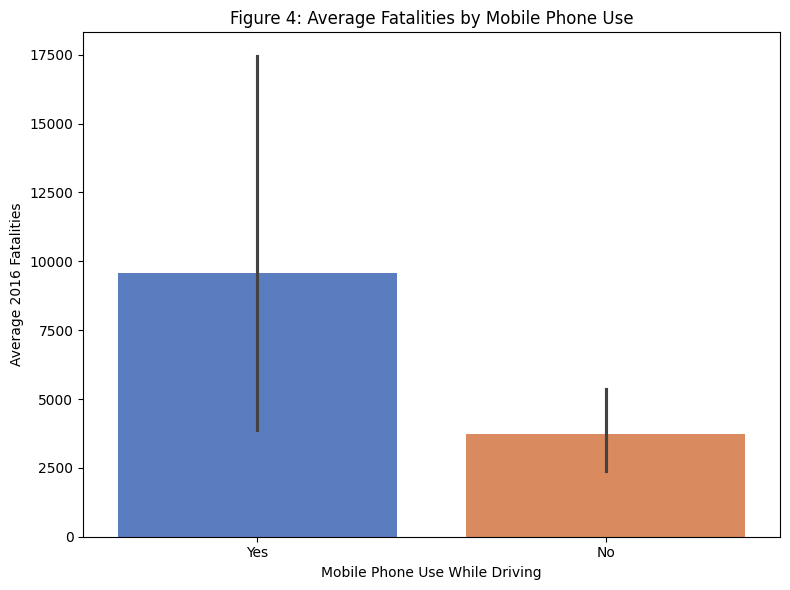

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=df_nomissing,
    x="Mobile phone use while driving",
    y="2016 WHO-estimated road traffic fatalities (update)",
    estimator='mean',
    palette="muted"
)
#Bar plot
plt.title("Figure 4: Average Fatalities by Mobile Phone Use")
plt.xlabel("Mobile Phone Use While Driving")
plt.ylabel("Average 2016 Fatalities")
plt.tight_layout()
plt.savefig("figure4_bar_mobile_vs_fatalities.png", dpi=300)
plt.show()

